In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [23]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [24]:
#Normalise the datset
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

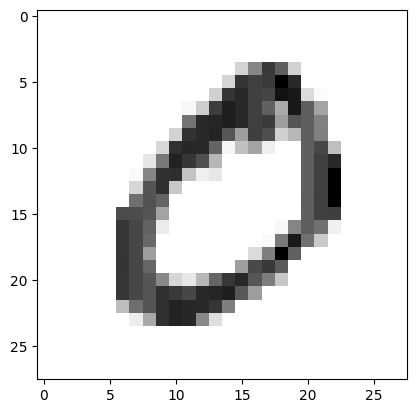

In [34]:
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.show()

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train,y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8735 - loss: 0.4606
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9641 - loss: 0.1136
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9761 - loss: 0.0737


In [38]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print(f'Validation_accuracy is:{val_acc} and Validation_loss is:{val_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9687 - loss: 0.0980
Validation_accuracy is:0.9714999794960022 and Validation_loss is:0.08773855119943619


In [40]:
model.save('Numeric_reader.keras')

In [41]:
new_model = tf.keras.models.load_model('Numeric_reader.keras')

In [42]:
predictions = new_model.predict([X_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


In [43]:
print(predictions)

[[2.9767957e-09 2.1461510e-09 6.1526398e-06 ... 9.9996495e-01
  4.5778665e-09 1.6835674e-08]
 [1.7783487e-10 2.0138093e-04 9.9979681e-01 ... 2.2098339e-09
  5.6102259e-08 3.9731343e-12]
 [2.0517948e-07 9.9925548e-01 4.6060864e-05 ... 2.1987507e-04
  1.7235559e-04 8.6299924e-06]
 ...
 [5.2967775e-10 1.7617493e-09 3.7221632e-08 ... 1.2001210e-06
  2.5321788e-07 2.4555493e-04]
 [8.4534304e-06 5.2682271e-08 3.3381778e-07 ... 1.0813252e-06
  2.9861956e-04 4.0036823e-09]
 [1.1440949e-07 2.1127004e-08 2.1006731e-07 ... 6.6955097e-10
  3.8152210e-09 2.2323323e-09]]


In [50]:
print(np.argmax(predictions[1]))

2


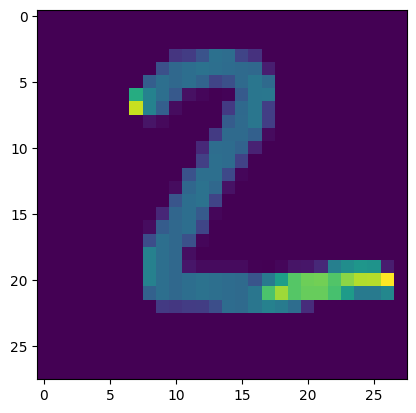

In [49]:
plt.imshow(X_test[1])
plt.show()